In [237]:

import mrcfile 
import numpy as np
import torchvision.datasets
import datetime
import os
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
# import transformers
import pytorch_lightning as pl
# import supervision as sv
from transformers import DetrConfig, DetrForObjectDetection, DetrImageProcessor, DetrForSegmentation, ConditionalDetrForObjectDetection,ConditionalDetrConfig,ConditionalDetrForSegmentation
import torch
import sys 
sys.path.append("/home/tyfei/cyroem")
import importlib 
import utils
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import modules
importlib.reload(utils)
importlib.reload(modules)
import json
import torch.nn as nn
from functools import partial
import torchmetrics

### play with GCN

In [18]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.nn import SAGEConv
import torch.nn as nn

# Load the Cora dataset (node classification task)
dataset = Planetoid(root='./Cora', name='Cora')

# Define the GNN model (Graph Convolutional Network - GCN)
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        # self.conv1 = GCNConv(in_channels, hidden_channels)
        # self.conv2 = GCNConv(hidden_channels, hidden_channels)
        # self.conv3 = GCNConv(hidden_channels, out_channels)
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # Second GCN layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        # Third GCN layer
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(dataset.num_node_features, hidden_channels=32, out_channels=dataset.num_classes).to(device)
data = dataset[0].to(device)  # Load the graph data
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)  # Forward pass
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])  # Loss for training nodes
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    out = model(data.x, data.edge_index)  # Forward pass
    pred = out.argmax(dim=1)  # Predicted labels
    correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
    acc = int(correct) / int(data.test_mask.sum())
    return acc

# Train the model for 200 epochs
for epoch in range(1, 1201):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')


Epoch: 001, Loss: 1.9535, Test Accuracy: 0.0640
Epoch: 002, Loss: 1.9514, Test Accuracy: 0.0640
Epoch: 003, Loss: 1.9494, Test Accuracy: 0.0640
Epoch: 004, Loss: 1.9473, Test Accuracy: 0.0640
Epoch: 005, Loss: 1.9453, Test Accuracy: 0.0640
Epoch: 006, Loss: 1.9434, Test Accuracy: 0.0640
Epoch: 007, Loss: 1.9414, Test Accuracy: 0.0640
Epoch: 008, Loss: 1.9394, Test Accuracy: 0.0640
Epoch: 009, Loss: 1.9375, Test Accuracy: 0.0640
Epoch: 010, Loss: 1.9355, Test Accuracy: 0.0640
Epoch: 011, Loss: 1.9335, Test Accuracy: 0.0640
Epoch: 012, Loss: 1.9315, Test Accuracy: 0.0640
Epoch: 013, Loss: 1.9295, Test Accuracy: 0.0650
Epoch: 014, Loss: 1.9276, Test Accuracy: 0.0650
Epoch: 015, Loss: 1.9255, Test Accuracy: 0.0650
Epoch: 016, Loss: 1.9235, Test Accuracy: 0.0650
Epoch: 017, Loss: 1.9215, Test Accuracy: 0.0660
Epoch: 018, Loss: 1.9194, Test Accuracy: 0.0660
Epoch: 019, Loss: 1.9173, Test Accuracy: 0.0660
Epoch: 020, Loss: 1.9152, Test Accuracy: 0.0660
Epoch: 021, Loss: 1.9131, Test Accuracy:

In [19]:
data.edge_index.shape

torch.Size([2, 10556])

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

# Load the Cora dataset (node classification task)
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Define the GNN model (Graph Convolutional Network - GCN)
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # Second GCN layer
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(dataset.num_node_features, hidden_channels=16, out_channels=dataset.num_classes).to(device)
data = dataset[0].to(device)  # Load the graph data
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)  # Forward pass
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])  # Loss for training nodes
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test():
    model.eval()
    out = model(data.x, data.edge_index)  # Forward pass
    pred = out.argmax(dim=1)  # Predicted labels
    correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
    acc = int(correct) / int(data.test_mask.sum())
    return acc

# Train the model for 200 epochs
for epoch in range(1, 201):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')


In [250]:
path = "/data/transformer_project/transforemer_model/train_data/training/results/deformable/fold1_try12/"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)
model = utils.getModel(configs)

Some weights of the model checkpoint at SenseTime/deformable-detr were not used when initializing DeformableDetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeformableDetrForObjectDetection wer

model at stage  stage 1 + 2


/home/feity/cryoem/utils.py:499: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  # print("model parameters ", p)


incompatible parameters []
finish loading parameters


In [ ]:
model = utils.load_model(model, os.path.join(path, "best_model.pth"))

In [239]:
ds = utils.get_stage12_dataset(configs)
dl = ds.train_dataloader()
for i, j in enumerate(dl):
    break

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
using batch size  8
loading annotations into memory...
Done (t=0.01s)
creating index...
index

In [248]:
j[0]["mark"]

['/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl',
 '/data/transformer_project/transforemer_model/train_data/training/data/annotations/TS_023.pkl']

In [246]:
j[0]["labels"][0].keys()

dict_keys(['bboxes', 'class_labels', 'item_id', 'orig_size', 'size', 'image_id', 'boxes', 'area', 'iscrowd', 'pos'])

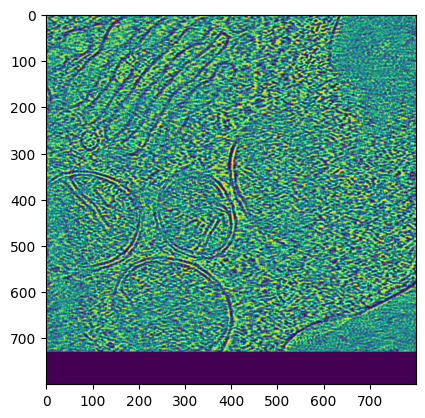

In [230]:
plt.imshow(j[0]["pixel_values"][0][1])

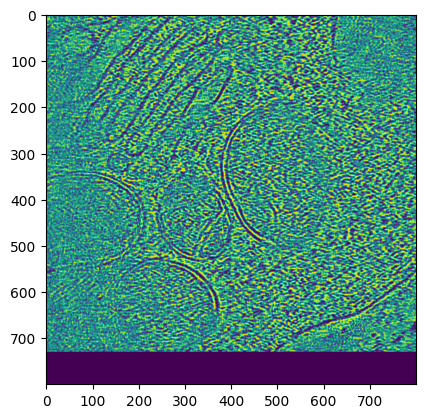

In [232]:
plt.imshow(j[0]["pixel_values"][4][1])

In [215]:
j[0]["pixel_values"].shape

torch.Size([5, 3, 800, 800])

In [193]:
if configs["model"]["stage"] == "stage 1":
    ds = utils.get_stage1_dataset(configs)
elif configs["model"]["stage"] == "stage 2":
    ds = utils.get_stage2_dataset(configs)
elif configs["model"]["stage"] == "stage mask":
    ds = utils.get_stageMask_dataset(configs)

/home/feity/cryoem/utils.py:898: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_list_train.append(torch.load(i))
/home/feity/cryoem/utils.py:902: FutureWarning: You are 

In [196]:
model = utils.getModel(configs)

Some weights of the model checkpoint at SenseTime/deformable-detr were not used when initializing DeformableDetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeformableDetrForObjectDetection wer

model at stage  stage 2


/home/feity/cryoem/utils.py:495: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(configs["model"]["load"], map_location="cpu")


incompatible parameters ['additional_input_layer.layer1.weight', 'additional_input_layer.layer1.bias', 'additional_input_layer.layer2.weight', 'additional_input_layer.layer2.bias', 'gnn.cls_head.2.weight', 'gnn.cls_head.2.bias', 'gnn.box_head.2.weight', 'gnn.box_head.2.bias', 'cri.weight']
finish loading parameters


In [197]:
dl = ds.train_dataloader()
for i, j in enumerate(dl):
    break

In [200]:
j

Data(x=[4876, 266], edge_index=[2, 92882], edge_train_mask=[92882], edge_val_mask=[92882], sample_mapping=[4876], y=[4876], box_masks=[4876], boxes=[4876, 4], train_mask=[4876], val_mask=[4876], edge_label=[92882])

In [199]:
model.training_step(j)

IndexError: Found indices in 'edge_index' that are larger than 4875 (got 5472). Please ensure that all indices in 'edge_index' point to valid indices in the interval [0, 4876) in your node feature matrix and try again.

### test naked GNN

In [178]:
model = modules.GCN(272, 10, 6, "GCNConv", True).cuda(1)
auroc = torchmetrics.AUROC("multiclass", average="macro", num_classes=6).cuda(1)

In [179]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.l1 = nn.Linear(266, 512)
        self.l2 = nn.Linear(512, 6)

    def forward(self, input, y):
        x = self.l1(input)
        x = torch.relu(x)
        x = self.l2(x)
        # x = nn.functional.softmax(x)
        return {"predict":x}
model = SimpleModel().cuda(1)

In [180]:
graph_train = torch.load("/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0051_9_stage2dataset.pkl") 
retdict_train = torch.load("/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0051_9_stage2dict.pkl")

/tmp/ipykernel_114454/1068036701.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph_train = torch.load("/data/transformer_project/transforemer_model/train_data/traini

In [181]:
graph_test = torch.load("/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0039_9_stage2dataset.pkl") 
retdict_test = torch.load("/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0039_9_stage2dict.pkl")

/tmp/ipykernel_114454/4260404348.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph_test = torch.load("/data/transformer_project/transforemer_model/train_data/trainin

In [182]:
def get_data(graph, retdict, device=None):
    x = graph.x
    box_masks = graph.box_masks
    edge_index = graph.edge_index
    target = retdict["boxes"] 
    target_y = graph.y
    target = target[box_masks]
    if device is not None:
        x = x.to(device)
        box_masks = box_masks.to(device)
        edge_index = edge_index.to(device)
        target = target.to(device)
        target_y = target_y.to(device)
    return x, box_masks, edge_index, target, target_y



In [184]:
optim = torch.optim.Adam(model.parameters(), lr=0.001) 
x, box_masks, edge_index, target, target_y = get_data(graph_train, retdict_train, device=1)           
# loss_func = partial(modules.loss _boxes, num_boxes=4)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

In [185]:
target_y.shape

torch.Size([7765])

In [187]:
ori = torch.ones((x.shape[0], 6)).cuda(1)
ori -= 0.5 
ori[:, :5] = x[:, 5:10]
loss_func(ori, target_y), auroc(ori, target_y)

(tensor(0.4623, device='cuda:1'), tensor(0.8758, device='cuda:1'))

In [188]:
losses = []
for i in range(2000):
    optim.zero_grad()
    out = model(x, edge_index)   
    loss = loss_func(out["predict"], target_y)
    loss.backward()
    optim.step()
    losses.append(loss.item())
    # print(loss.item())
    if i % 20 == 0:
        print(loss.item(), auroc(out["predict"], target_y))
        # torch.save(model.state_dict(), "/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0039_9_stage2dataset.pkl")
        # torch.save(graph, "/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0039_9_stage2dict.pkl")

2.026480197906494 tensor(0.4493, device='cuda:1')
0.35744524002075195 tensor(0.8515, device='cuda:1')
0.31376150250434875 tensor(0.8892, device='cuda:1')
0.29256772994995117 tensor(0.9007, device='cuda:1')
0.27599233388900757 tensor(0.9095, device='cuda:1')
0.26367437839508057 tensor(0.9168, device='cuda:1')
0.2542707324028015 tensor(0.9240, device='cuda:1')
0.2463599592447281 tensor(0.9302, device='cuda:1')
0.23947562277317047 tensor(0.9353, device='cuda:1')
0.2336616814136505 tensor(0.9394, device='cuda:1')
0.22862620651721954 tensor(0.9432, device='cuda:1')
0.22400425374507904 tensor(0.9467, device='cuda:1')
0.21957316994667053 tensor(0.9498, device='cuda:1')
0.21534498035907745 tensor(0.9526, device='cuda:1')
0.21125264465808868 tensor(0.9551, device='cuda:1')
0.20729219913482666 tensor(0.9572, device='cuda:1')
0.20341938734054565 tensor(0.9591, device='cuda:1')
0.19978336989879608 tensor(0.9608, device='cuda:1')
0.19635814428329468 tensor(0.9625, device='cuda:1')
0.192974418401718

In [189]:
x, box_masks, edge_index, target, target_y = get_data(graph_test, retdict_test, device=1)
# ori = x[box_masks]
# ori = ori[:, 1:5]
# modules.loss_boxes(ori, target, 2)

In [191]:
model = model.eval()
out = model(x, edge_index)   
loss_func(out["predict"], target_y), auroc(out["predict"], target_y)
# modules.loss_boxes(out["box"][box_masks], target, 3)

(tensor(0.9972, device='cuda:1', grad_fn=<NllLossBackward0>),
 tensor(0.6949, device='cuda:1'))

## test small batch

In [2]:
path = "/data/transformer_project/transforemer_model/train_data/training/results/deformable/fold6_pretrain_test/"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)
# configs["data"]["image_path"] = "/mnt/panbz/lab/transforemer_model/train_data/training/data/"
# configs["data"]["annotation_path_train"] = "/mnt/panbz/lab/transforemer_model/train_data/training/data/annotations/sllt0039_9.pkl"
# configs["data"]["annotation_path_val"] = "/mnt/panbz/lab/transforemer_model/train_data/training/data/annotations/sllt0051_9.pkl"

In [3]:
if configs["model"]["stage"] == "stage 1":
    ds = utils.get_stage1_dataset(configs)
elif configs["model"]["stage"] == "stage 2":
    ds = utils.get_stage2_dataset(configs)
elif configs["model"]["stage"] == "stage mask":
    ds = utils.get_stageMask_dataset(configs)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [4]:
model = utils.getModel(configs)

Some weights of the model checkpoint at SenseTime/deformable-detr were not used when initializing DeformableDetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeformableDetrForObjectDetection wer

model at stage  stage 1


/home/feity/cryoem/utils.py:496: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(configs["model"]["load"], map_location="cpu")


incompatible parameters ['model.class_embed.0.weight', 'model.class_embed.0.bias', 'model.class_embed.1.weight', 'model.class_embed.1.bias', 'model.class_embed.2.weight', 'model.class_embed.2.bias', 'model.class_embed.3.weight', 'model.class_embed.3.bias', 'model.class_embed.4.weight', 'model.class_embed.4.bias', 'model.class_embed.5.weight', 'model.class_embed.5.bias']
finish loading parameters


In [5]:
dl = ds.train_dataloader()
for i, j in enumerate(dl):
    break

In [ ]:
optim = model.configure_optimizers() 
optim = optim[0][0]

[AdamW (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     initial_lr: 0.0001
     lr: 0.0001
     maximize: False
     weight_decay: 1e-05
 
 Parameter Group 1
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     initial_lr: 0.0001
     lr: 0.0001
     maximize: False
     weight_decay: 1e-05
 
 Parameter Group 2
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     initial_lr: 0.0001
     lr: 0.0001
     maximize: False
     weight_decay: 1e-05
 )]

In [ ]:
model = model.cuda(0)
for i in range(2000):
    optim.zero_grad()
    loss, loss_dict = model.common_step_stage1(j) 
    loss.backward()
    optim.step()
    if i % 10 == 0:
        print(loss_dict)

{'loss_ce': tensor(42.8238, device='cuda:0', grad_fn=<MulBackward0>), 'loss_bbox': tensor(0.0538, device='cuda:0', grad_fn=<DivBackward0>), 'loss_giou': tensor(0.7565, device='cuda:0', grad_fn=<DivBackward0>), 'cardinality_error': tensor(87.5000, device='cuda:0')}
{'loss_ce': tensor(6.9736, device='cuda:0', grad_fn=<MulBackward0>), 'loss_bbox': tensor(0.0243, device='cuda:0', grad_fn=<DivBackward0>), 'loss_giou': tensor(0.5388, device='cuda:0', grad_fn=<DivBackward0>), 'cardinality_error': tensor(98.5000, device='cuda:0')}
{'loss_ce': tensor(1.7914, device='cuda:0', grad_fn=<MulBackward0>), 'loss_bbox': tensor(0.0204, device='cuda:0', grad_fn=<DivBackward0>), 'loss_giou': tensor(0.4213, device='cuda:0', grad_fn=<DivBackward0>), 'cardinality_error': tensor(160.5000, device='cuda:0')}
{'loss_ce': tensor(1.1194, device='cuda:0', grad_fn=<MulBackward0>), 'loss_bbox': tensor(0.0345, device='cuda:0', grad_fn=<DivBackward0>), 'loss_giou': tensor(0.5172, device='cuda:0', grad_fn=<DivBackward0>

KeyboardInterrupt: 

### test stage2

In [3]:
graph = torch.load("/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0039_9_stage2dataset.pkl") 
retdict = torch.load("/data/transformer_project/transforemer_model/train_data/training/data/stage2/fold1_sllt0039_9_stage2dict.pkl")
# model = utils.loadModel("/data/transformer_project/transforemer_model/train_data/training/results/deformable/fold1_stage2_424", "epoch=199-validate_loss=3.5734-validate_acc=0.9490.ckpt")

/tmp/ipykernel_84582/2483119653.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load("/data/transformer_project/transforemer_model/train_data/training/data

In [5]:
path = "/data/transformer_project/transforemer_model/train_data/training/results/deformable/fold1_stage2_424"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)
model = utils.getModel(configs)

Some weights of the model checkpoint at SenseTime/deformable-detr were not used when initializing DeformableDetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeformableDetrForObjectDetection wer

model at stage  stage 2


/home/feity/cryoem/utils.py:490: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(configs["model"]["load"], map_location="cpu")


incompatible parameters ['additional_input_layer.layer1.weight', 'additional_input_layer.layer1.bias', 'additional_input_layer.layer2.weight', 'gnn.cls_head.0.weight', 'gnn.cls_head.0.bias', 'gnn.cls_head.2.weight', 'gnn.cls_head.2.bias', 'gnn.box_head.0.weight', 'gnn.box_head.0.bias', 'gnn.box_head.2.weight', 'gnn.box_head.2.bias', 'cri.weight']
finish loading parameters


In [14]:
graph

Data(x=[5908, 266], edge_index=[2, 138028], y=[5908], box_masks=[5908], boxes=[5908, 4], edge_label=[138028])

In [6]:
x = graph.x
y = graph.y 
edge = graph.edge_index
box_masks = graph.box_masks
edge_labels = graph.edge_label
mask = torch.ones_like(y, dtype=torch.bool)
boxes = graph.boxes

In [7]:
optim = model.configure_optimizers() 
optim = optim[0][0]

In [8]:
model = model.cuda(0)
for i in range(2000):
    optim.zero_grad()
    loss, loss_dict = model.common_step_stage2(x, edge, mask, y, boxes, box_masks, edge_labels) 
    loss.backward()
    optim.step()
    if i % 10 == 0:
        print(loss_dict)

{'loss': tensor(6.3627, device='cuda:0', grad_fn=<AddBackward0>), 'acc': tensor(0.0125, device='cuda:0'), 'loss_boxes': tensor(3.7667, device='cuda:0', grad_fn=<AddBackward0>), 'loss_edge': tensor(0.7223, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)}
{'loss': tensor(5.8498, device='cuda:0', grad_fn=<AddBackward0>), 'acc': tensor(0.9100, device='cuda:0'), 'loss_boxes': tensor(3.6927, device='cuda:0', grad_fn=<AddBackward0>), 'loss_edge': tensor(0.5258, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)}
{'loss': tensor(4.6660, device='cuda:0', grad_fn=<AddBackward0>), 'acc': tensor(0.9103, device='cuda:0'), 'loss_boxes': tensor(3.5686, device='cuda:0', grad_fn=<AddBackward0>), 'loss_edge': tensor(0.1251, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)}
{'loss': tensor(3.8482, device='cuda:0', grad_fn=<AddBackward0>), 'acc': tensor(0.9103, device='cuda:0'), 'loss_boxes': tensor(3.6013, device='cuda:0', grad_fn=<AddBackward0>), 'loss_edge': tensor(0.0168, device='c

In [2]:

import mrcfile 
import numpy as np
import torchvision.datasets
import datetime
import os
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
# import transformers
import pytorch_lightning as pl
# import supervision as sv
from transformers import DetrConfig, DetrForObjectDetection, DetrImageProcessor, DetrForSegmentation, ConditionalDetrForObjectDetection
import torch
import sys 
sys.path.append("/home/tyfei/cyroem")
import importlib 
import utils
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import modules
importlib.reload(utils)
importlib.reload(modules)

<module 'modules' from '/home/feity/cryoem/modules.py'>

In [2]:
import torchvision
torchvision.disable_beta_transforms_warning()
from torchvision.tv_tensors import BoundingBoxes, Mask
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.v2  as transforms
from functools import partial
import numpy as np
import sys 
import os
sys.path.append("/home/tyfei/cyroem")
import utils
import pycocotools
import json
import torch
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from transformers import DetrForObjectDetection, DetrImageProcessor, DetrForSegmentation
import modules
from torch_geometric.data import Data 

/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNetWithAdditionalInput(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, additional_input_dim=10):
        super(UNetWithAdditionalInput, self).__init__()

        # Contracting path (Encoder)
        self.enc1 = self.double_conv(in_channels, 64)
        self.enc2 = self.double_conv(64, 128)
        self.enc3 = self.double_conv(128, 256)
        self.enc4 = self.double_conv(256, 512)

        # Bottleneck
        self.bottleneck = self.double_conv(512, 1024)

        # Process additional input
        self.additional_fc = nn.Sequential(
            nn.Linear(additional_input_dim, 1024),  # Map additional input to the same dimension as bottleneck
            # nn.ReLU(inplace=True)
        )

        # Expanding path (Decoder)
        self.upconv4 = self.upconv(2048, 512)  # Bottleneck + Additional input (1024 + 1024 = 2048)
        self.dec4 = self.double_conv(1024, 512)

        self.upconv3 = self.upconv(512, 256)
        self.dec3 = self.double_conv(512, 256)

        self.upconv2 = self.upconv(256, 128)
        self.dec2 = self.double_conv(256, 128)

        self.upconv1 = self.upconv(128, 64)
        self.dec1 = self.double_conv(128, 64)

        # Output layer
        self.out_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def double_conv(self, in_channels, out_channels):
        """Double convolution layers with ReLU activation."""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU6(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU6(inplace=True)
        )

    def upconv(self, in_channels, out_channels):
        """Upsample the feature map using transpose convolution."""
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

    def crop_and_concat(self, upsampled, bypass):
        """Crop the bypass connection to match the size of the upsampled feature map."""
        _, _, h, w = upsampled.size()
        bypass = F.interpolate(bypass, size=(h, w), mode="bilinear", align_corners=True)
        return torch.cat((upsampled, bypass), dim=1)

    def forward(self, x, additional_input):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(F.max_pool2d(enc1, kernel_size=2))
        enc3 = self.enc3(F.max_pool2d(enc2, kernel_size=2))
        enc4 = self.enc4(F.max_pool2d(enc3, kernel_size=2))

        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(enc4, kernel_size=2))

        # Process additional input
        additional_input_processed = self.additional_fc(additional_input)
        additional_input_processed = additional_input_processed.unsqueeze(-1).unsqueeze(-1)  # Reshape to (batch, 1024, 1, 1)
        additional_input_processed = additional_input_processed.expand(-1, -1, bottleneck.size(2), bottleneck.size(3))  # Match spatial dims

        # Concatenate bottleneck and additional input
        bottleneck = torch.cat((bottleneck, additional_input_processed), dim=1)

        # Decoder
        up4 = self.upconv4(bottleneck)
        concat4 = self.crop_and_concat(up4, enc4)
        dec4 = self.dec4(concat4)

        up3 = self.upconv3(dec4)
        concat3 = self.crop_and_concat(up3, enc3)
        dec3 = self.dec3(concat3)

        up2 = self.upconv2(dec3)
        concat2 = self.crop_and_concat(up2, enc2)
        dec2 = self.dec2(concat2)

        up1 = self.upconv1(dec2)
        concat1 = self.crop_and_concat(up1, enc1)
        dec1 = self.dec1(concat1)

        # Output layer
        output = self.out_conv(dec1)
        output = output.squeeze(1)  # Remove channel dimension
        # output = torch.sigmoid(output)  # Sigmoid activation for binary classification
        return output

# Test the modified U-Net model
if __name__ == "__main__":
    # Create the U-Net model with additional input
    model = UNetWithAdditionalInput(in_channels=3, out_channels=1, additional_input_dim=272)

    # Create a random input tensor with size (batch_size=1, channels=3, height=800, width=800)
    input_tensor = torch.randn(1, 3, 800, 800)

    # Create a random additional input tensor with size (batch_size=1, additional_input_dim=10)
    additional_input = torch.randn(1, 272)

    # Perform a forward pass
    output = model(input_tensor, additional_input)

    # Check the output size
    print("Input shape: ", input_tensor.shape)
    print("Additional input shape: ", additional_input.shape)
    print("Output shape:", output.shape)


Input shape:  torch.Size([1, 3, 800, 800])
Additional input shape:  torch.Size([1, 272])
Output shape: torch.Size([1, 800, 800])


In [13]:
import importlib
import modules
import utils
# model = modules.UNet(3, 1, 272, False)
# model(input_tensor, additional_input)

In [14]:
graph = torch.load("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/stage2dataset/TS_031_boxes_label_detr_all.pth") 
retdict = torch.load("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/stage2dataset/TS_031_mask.pth")
model = utils.loadModel("checkpoints/stage_2_mask_new", "last.ckpt")

/tmp/ipykernel_1035245/2315025304.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load("/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/stage2datas

model at stage  stage mask


/home/feity/cryoem/utils.py:450: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(configs["model"]["load"], map_location="cpu")
/home/feity/cryoem/utils.py:813: 

In [15]:
retdict

{'embed': tensor([[-0.7758,  0.0840, -0.5103,  ..., -0.0757,  0.3651, -2.0675],
         [-0.8708,  0.3526, -0.1641,  ...,  0.0312,  0.1059, -1.8408],
         [-1.1386,  0.2005, -0.1643,  ..., -0.0675,  0.1944, -1.9651],
         ...,
         [-1.1132,  0.3688,  0.5346,  ..., -0.3186, -1.1371, -1.6117],
         [-1.1785,  0.4808,  0.9233,  ...,  0.0394, -1.1852, -2.2074],
         [-1.5013,  0.5166,  1.4802,  ..., -0.3030, -1.6792, -1.8967]]),
 'pixel_values': tensor([[[[0.4591, 0.5027, 0.5903,  ..., 0.0000, 0.0000, 0.0000],
           [0.4859, 0.5037, 0.5378,  ..., 0.0000, 0.0000, 0.0000],
           [0.5875, 0.5171, 0.4590,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.6332, 0.7162, 0.6776,  ..., 0.0000, 0.0000, 0.0000],
           [0.5970, 0.6315, 0.6131,  ..., 0.0000, 0.0000, 0.0000],
           [0.5596, 0.4961, 0.4912,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.4591, 0.5027, 0.5903,  ..., 0.0000, 0.0000, 0.0000],
           [0.4859, 0.5037, 0.5378,  ..., 0.0

In [16]:
need = []
for i in retdict["sample_mapping"]:
    if retdict["sample_mapping"][i] == 20:
        need.append(i)

In [17]:
embed = retdict["embed"]
embed = embed[need]

In [18]:
mask = retdict["masks"][need]
mask.shape

torch.Size([259, 800, 800])

In [19]:
s = mask.sum(axis=[1, 2])
mask = mask[s>10000]#.to(1)
embed = embed[s>10000]#.to(1)
s = mask.sum(axis=[1, 2])
mask = mask[s<18000].to("cpu")
embed = embed[s<18000].to("cpu")

In [20]:
mask.shape

torch.Size([3, 800, 800])

In [24]:
pixel_values = retdict["pixel_values"][20] 
pixel_values = pixel_values.unsqueeze(0).repeat(3, 1, 1, 1).to("cpu")

In [25]:
model = model.to("cpu")
out = model(pixel_values = pixel_values.float(), stage_2_embeds = embed.float())


In [10]:
def focal_loss(inputs, targets, alpha: float = 0.75, gamma: float = 2.0):
    ce_loss = F.binary_cross_entropy(inputs, targets, reduction="none")
        # add modulating factor
    p_t = inputs.detach() * targets + (1 - inputs.detach()) * (1 - targets)
    loss = ce_loss * ((1 - p_t) ** gamma)

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss

    return loss.sum()

In [ ]:
def sigmoid_focal_loss(inputs, targets, num_boxes=None, alpha: float = 0.25, gamma: float = 2):
    """
    Loss used in RetinaNet for dense detection: https://arxiv.org/abs/1708.02002.

    Args:
        inputs (`torch.FloatTensor` of arbitrary shape):
            The predictions for each example.
        targets (`torch.FloatTensor` with the same shape as `inputs`)
            A tensor storing the binary classification label for each element in the `inputs` (0 for the negative class
            and 1 for the positive class).
        alpha (`float`, *optional*, defaults to `0.25`):
            Optional weighting factor in the range (0,1) to balance positive vs. negative examples.
        gamma (`int`, *optional*, defaults to `2`):
            Exponent of the modulating factor (1 - p_t) to balance easy vs hard examples.

    Returns:
        Loss tensor
    """
    prob = inputs.sigmoid()
    ce_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction="none")
    # add modulating factor
    p_t = prob * targets + (1 - prob) * (1 - targets)
    loss = ce_loss * ((1 - p_t) ** gamma)

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss
        
    if num_boxes is None:
        num_boxes = targets.shape[0]

    return loss.mean(1).sum() / num_boxes

In [35]:
model = modules.UNet(3, 1, 272, False)
# model = UNetWithAdditionalInput(3, 1, 272)
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
model = model.to(1)
# cri = focal_loss
cri = nn.BCELoss()
for i in range(256):
    opt.zero_grad()
    out = model(pixel_values.float(), embed)
    # loss = F.binary_cross_entropy_with_logits(out, mask.float())
    loss = sigmoid_focal_loss(out, mask.float(), 6)
    loss.backward()
    opt.step()
    if i % 10 == 0:
        print(loss.item())

72.72940063476562
7.901914119720459
4.396106719970703
3.924569606781006
1.4608027935028076
0.7827390432357788
0.9118880033493042
1.9047420024871826
1.2065860033035278
0.6309958696365356
0.41290396451950073
0.33044591546058655
0.2778283953666687
0.250027060508728
0.2131613940000534
0.21738949418067932
3.355851650238037
1.8730990886688232
0.9257339239120483
0.5306844711303711
0.3762527406215668
0.324312686920166
0.2685006856918335
0.23973487317562103
0.21667061746120453
0.20141124725341797


In [26]:
out[:, :10]

tensor([[[-1.8650, -2.4607, -2.8178,  ..., -2.2239, -2.0197, -1.5972],
         [-2.3235, -2.9971, -3.3607,  ..., -3.3405, -2.9959, -2.2567],
         [-2.4385, -2.9152, -3.1466,  ..., -3.8580, -3.4478, -2.5579],
         ...,
         [-2.4914, -2.9041, -3.0347,  ..., -4.1267, -3.6660, -2.6856],
         [-2.4903, -2.9488, -3.0913,  ..., -4.1448, -3.6802, -2.6932],
         [-2.5066, -2.9884, -3.1372,  ..., -4.1579, -3.6904, -2.6986]],

        [[-1.9906, -2.5855, -2.9450,  ..., -2.2616, -2.0787, -1.6826],
         [-2.4563, -3.1129, -3.4700,  ..., -3.3387, -3.0294, -2.3316],
         [-2.5704, -3.0147, -3.2308,  ..., -3.8260, -3.4601, -2.6237],
         ...,
         [-2.6292, -3.0086, -3.1177,  ..., -3.9838, -3.5953, -2.7110],
         [-2.6280, -3.0561, -3.1777,  ..., -3.9828, -3.5948, -2.7112],
         [-2.6456, -3.0992, -3.2278,  ..., -3.9812, -3.5938, -2.7108]],

        [[-1.7027, -2.2645, -2.6129,  ..., -2.0436, -1.8313, -1.4146],
         [-2.1675, -2.8054, -3.1653,  ..., -3

In [27]:
out.shape
out = torch.sigmoid(out)
out = out.cpu().detach().numpy()

In [28]:
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
np.max(out), np.min(out)

(0.3641956, 0.0021076498)

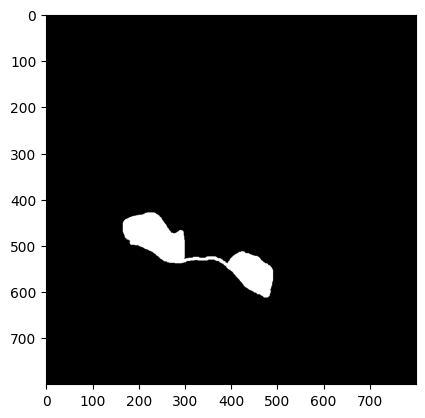

In [30]:
q = mask.cpu().float().numpy()
plt.imshow(q[2], cmap="gray")

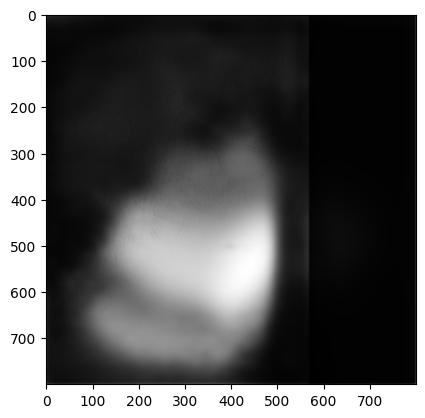

In [31]:
import matplotlib.pyplot as plt 

out1 = out[2]
plt.imshow(out1, cmap="gray")